mirror_driver.ipynb
Eric Graves - eridgraves@gmail.com
Created 06/30/2019

## Mechanical Mirror Test Code
Beta code to transfer images to a stylized "lo-fi" mirror representation
As seen: https://www.smoothware.com/danny/newshinyballsmirror.html

<1-23-2020> Currently, this doesn't work because of conflicting versions of libpng between when I originally wrote this and the Anaconda update at the end of Summer 2019. This is currently preventing conda from correctly opening pngs in Jupyter, which breaks this code. The Jupyter Terminal gives the error message "libpng warning: Application built with libpng-1.4.12 but running with 1.6.37", and I don't currently have time to force an update and deal with messing up my conda environment. 

TypeError: Image data of dtype <U9 cannot be converted to float

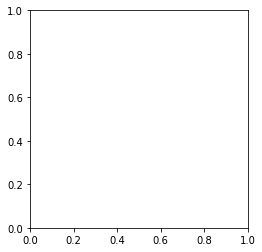

In [12]:
# Imports and environment setup
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
import os
%matplotlib inline

# DEBUG shows input and output images, DEBUG_VERBOSE shows images and sizes at each step
DEBUG = True
DEBUG_VERBOSE = True

if not DEBUG :
    DEBUG_VERBOSE = False # Can only be enabled in DEBUG mode

# Test image name
TEST_IMAGE = 'Lenna.png'#'image5.png'# 
plt.imshow(TEST_IMAGE,cmap='gray')
# print current directory for debugging

TypeError: Image data of dtype object cannot be converted to float

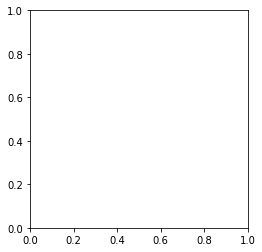

In [14]:
img = cv.imread(TEST_IMAGE, 0)
#h,w = img.shape[:2]
if DEBUG_VERBOSE :
    #print(img.shape)
    plt.imshow(img,cmap='gray') # Use grayscale image
    plt.title("Test Image")
    plt.show()

In [15]:
# Determine refresh rate --> probably 1/sec or so

# Get an image and crop to square 
img_crop = img[0:h,0:h] #img.crop(0,0,h,h) #img[0:w,0:w] 
if DEBUG : 
    plt.imshow(img_crop,cmap='gray') # Use grayscale image
    plt.title("Test Image")
    plt.show()
    print(img_crop.shape)
    
# Make destination image of same size
dst = np.zeros(h);

# Use Median Blur to average pixel areas over 50 x 50 regions
#-- Calculate kernel size : must be odd
mb_kern = (int) (h/50)
if mb_kern % 2 == 0:
    mb_kern += 1
    
#-- Blur over kernal size 
dst = cv.medianBlur(img_crop, mb_kern)
if DEBUG_VERBOSE : 
    plt.imshow(dst,cmap='gray') # Use grayscale image
    plt.title("Blurred Image")
    plt.show()
    print(dst.shape)

NameError: name 'h' is not defined

In [ ]:
## SQUARE OUTPUT PIXELS IN A GRID 

# Resize image to 50x50 pixels
#-- From Median Blurred Image : looks better
out = cv.resize(dst, (30,30))
if DEBUG : 
    plt.imshow(out,cmap='gray') # Use grayscale image
    plt.title("Scaled Blurred Image")
    plt.show()
    print(out.shape)
    print(out)
    
#-- Without Median Blur
dst = cv.resize(img_crop, (30,30))
if DEBUG_VERBOSE : 
    plt.imshow(dst,cmap='gray') # Use grayscale image
    plt.title("Scaled Unblurred Image")
    plt.show()
    print(dst.shape)

In [ ]:
## Square OUTPUT PIXELS IN DIAGONAL GRID
##-- Stagger each row so that pixels form lines at 45degrees (or so)
##-- Center of pixels above will line up with the edges

# Get cell size
cell_diam = 30
cell_radius = (int) (cell_diam / 2)
if cell_radius % 2 == 0:
    cell_radius += 1
    
## Get first row of areas centers
centers = []
centers_y = []
REG_FLAG = True
cell_center = cell_radius

# For rows of cells in the image
for j in range(cell_center, h , cell_radius):
    
    # Reset temporary array
    temp = []
    
    if(REG_FLAG):
        # Offset center column
        for i in range(cell_diam, h - cell_diam, cell_diam):
            temp.append(i) # Just x values
            #temp.append((i, j)) # Append coordinates
        row = np.array(temp)
        centers.append(row)
        REG_FLAG = False
    
    else : 
        # Regular Center column
        for i in range(cell_radius, h - cell_diam, cell_diam): # Cut off rightmost point to make rows have equal number of members
            temp.append(i) # Just x values
            #temp.append((i, j)) # Append coordinates
        row_d = np.array(temp)
        centers.append(row_d)
        REG_FLAG = True

    centers_y.append(j) # Append y coordinates to separate array
    

centers_y = np.array(centers_y)
print(centers_x)
# Centers now has coordinates of center points in form (x_coord, y_coord)
if DEBUG:
    print("CENTER_COORD: ")
    print(centers_y.shape)

## For each center point:
for point in centers_y:
    
    print(point)
    # Average values of each point within cell_radius
    for x_val in range(point - cell_radius, point + cell_radius):
        print(x_val)
    # (center_x - cell_radius, center_y - cell_radius) === (center_x + cell_radius, center_y - cell_radius)
    #  ||                                                                                              ||
    #  ||                                     (center_x, center_y)                                     ||
    #  ||                                                                                              ||
    # (center_x - cell_radius, center_y + cell_radius) === (center_x + cell_radius, center_y + cell_radius)
    
# Assign all cells within cell_radius this average value

In [ ]:
# TODO:
#-- One region per motor
#-- Median filter? Or focus on edges, and transfer each to nearest region.

# Send to output
#-- Can this be parallelized?
#-- For now: print out as text